<a href="https://colab.research.google.com/github/DanielAndresSmg/Attendance-Tracking-Based-On-Face-Recognition/blob/main/Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing Dataset**

Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/StartupCampus/penguins_size.csv') 
study_data = pd.read_csv('/content/drive/MyDrive/Dataset/StartupCampus/penguins_size.csv')   

Memanggil tabel data

In [ ]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [ ]:
data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


***
**Insight**
***
Berapa rata - rata body mass penguin?

##**Handling Missing Values**

Cek jumlah missing value!

In [ ]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Drop missing value pada culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g!

In [ ]:
data.drop(data[data['body_mass_g'].isnull()].index,axis=0, inplace=True)
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

Mengisi missing value pada sex dengan modus!

In [ ]:
data['sex'] = data['sex'].fillna('MALE')
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut! 

In [ ]:
data.drop(data[data['sex']=='.'].index, inplace=True)

Cek kembali apakah masih ada missing value!

In [ ]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

***
**Insight**
***
Apakah masih terdapat missing value?

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

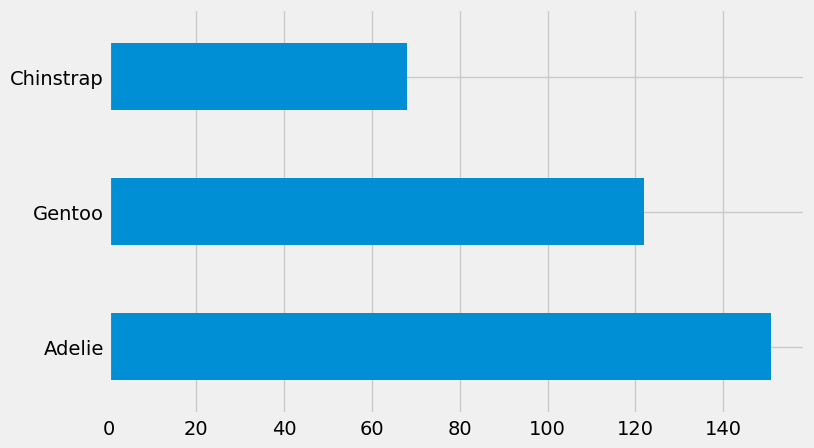

In [ ]:
data['species'].value_counts().plot(kind='barh')
plt.show()

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak?

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

culmen_length vs flipper_length


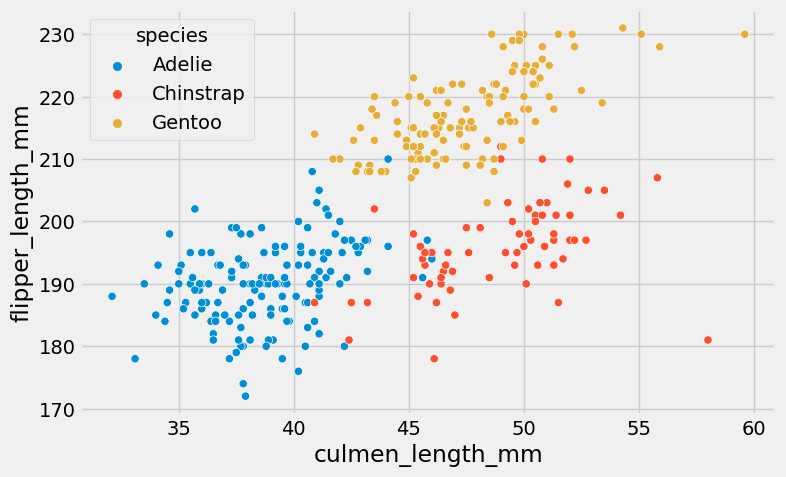

In [ ]:
print('culmen_length vs flipper_length')
sns.scatterplot(data=data, x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length?

Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

flipper_length vs body_mass


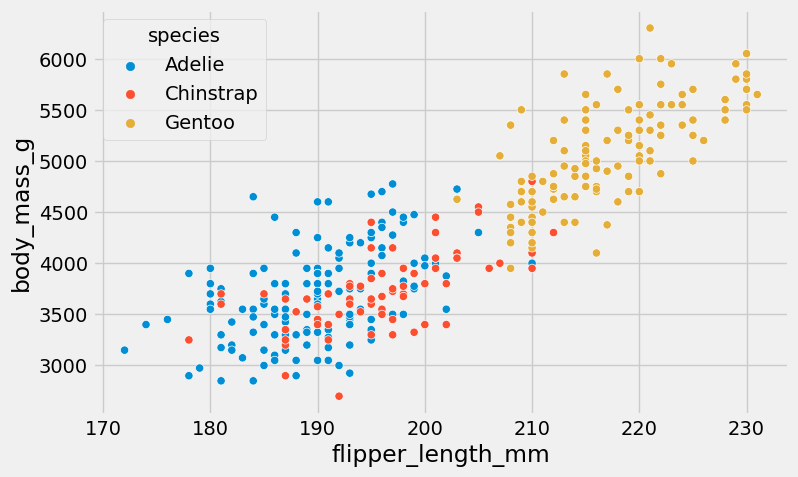

In [ ]:
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass?

Tampilkan pairplot dari semua variabel!

Pairplot


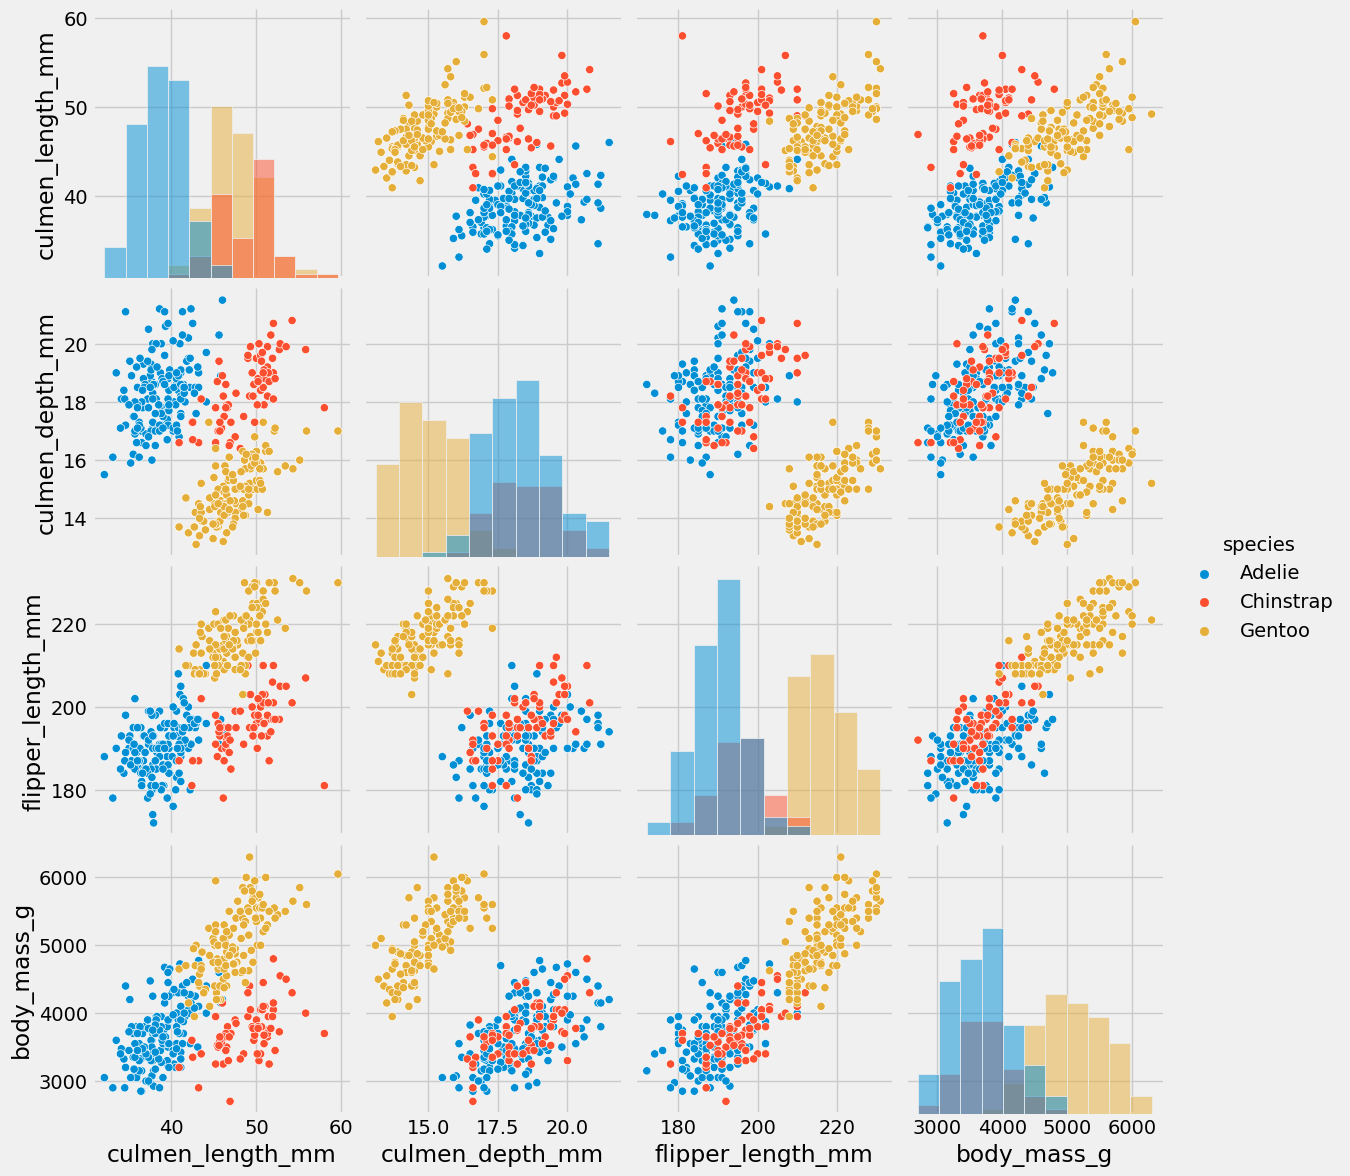

In [ ]:
print('Pairplot')
sns.pairplot(data=data[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas?

#**Module 3: Machine Learning**

##**Data Encoding**

In [ ]:
data1 = data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            341 non-null    object 
 1   island             341 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                341 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.3+ KB


In [ ]:
data.sex = data.sex.astype("category")

In [ ]:
data['island'] = data.island.astype("category")

In [ ]:
data.species = data.species.astype("category")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            341 non-null    category
 1   island             341 non-null    category
 2   culmen_length_mm   341 non-null    float64 
 3   culmen_depth_mm    341 non-null    float64 
 4   flipper_length_mm  341 non-null    float64 
 5   body_mass_g        341 non-null    float64 
 6   sex                341 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


Lakukan data encoding pada kolom 'species' dan 'island'!

In [ ]:
data = pd.get_dummies(data, columns = ['species','island'])
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,MALE,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,FEMALE,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,FEMALE,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,FEMALE,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,MALE,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE,0,0,1,1,0,0
340,46.8,14.3,215.0,4850.0,FEMALE,0,0,1,1,0,0
341,50.4,15.7,222.0,5750.0,MALE,0,0,1,1,0,0
342,45.2,14.8,212.0,5200.0,FEMALE,0,0,1,1,0,0


Data encoding untuk kolom 'sex', kodekan male sebagai 0 dan female sebagai 1!

In [ ]:
obj_sex = {
    'MALE' : 0,
    'FEMALE' : 1
}

In [ ]:
data.sex = data.sex.replace(obj_sex)
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0,1,1,0,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,1,0,0
341,50.4,15.7,222.0,5750.0,0,0,0,1,1,0,0
342,45.2,14.8,212.0,5200.0,1,0,0,1,1,0,0


In [ ]:
#pindahkan sex ke samping paling kanan
cols = data.columns.tolist()
cols = cols[:4] + cols[5:] + cols[4:5]
data = data.reindex(columns=cols)
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1


***
**Insight**
***
Bagaimana dataset setelah dilakukan encoding? <br>
Jawab :<br>

Setelah dilakukannya Encoding pada data sebelumnya, terdapat perbedaan yang signifikat yaitu tidak terdapat lagi cell atau pun raw yang isinya itu data tekstual. Hal ini digunakan karena hanya bentuk numerik yang dapat diproses oleh model.

##**Memisahkan Variabel Dependen dan Independen**

Variabel dependen yang digunakan adalah data pada kolom 'sex', kolom lainnya merupakan variabel independen

Pisahkan variabel independen sebagai X dan independen sebagai y!

In [ ]:
#input your code here
x = data.iloc[:, :-1].values # variabel independen
y = data.iloc[:, -1].values # variabel dependen

In [ ]:
x

array([[ 39.1,  18.7, 181. , ...,   0. ,   0. ,   1. ],
       [ 39.5,  17.4, 186. , ...,   0. ,   0. ,   1. ],
       [ 40.3,  18. , 195. , ...,   0. ,   0. ,   1. ],
       ...,
       [ 50.4,  15.7, 222. , ...,   1. ,   0. ,   0. ],
       [ 45.2,  14.8, 212. , ...,   1. ,   0. ,   0. ],
       [ 49.9,  16.1, 213. , ...,   1. ,   0. ,   0. ]])

In [ ]:
y

[0, 1, 1, 1, 0, ..., 1, 1, 0, 1, 0]
Length: 341
Categories (2, int64): [1, 0]

##**Scaling the Data**

Lakukan scaling pada x!

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x[:, :3] = scaler.fit_transform(x[:, :3])

In [ ]:
x

array([[-0.88290872,  0.78276694, -1.41564362, ...,  0.        ,
         0.        ,  1.        ],
       [-0.80964185,  0.12394677, -1.05938201, ...,  0.        ,
         0.        ,  1.        ],
       [-0.66310812,  0.42801762, -0.41811113, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.18688028, -0.73758731,  1.50570154, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.234411  , -1.19369358,  0.79317833, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.09529669, -0.53487341,  0.86443065, ...,  1.        ,
         0.        ,  0.        ]])

##**Spltting Dataset**

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#input your code here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##**Model Fitting**

Build model klasifikasi machine learning menggunakan model Decision Tree!

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Buat model klasifikasi Decision Tree
clf = DecisionTreeClassifier()

# Fit model ke training dataset
clf.fit(x_train, y_train)

# Prediksi target variable untuk testing dataset
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0])

[Text(0.3787202380952381, 0.9545454545454546, 'x[3] <= 3712.5\ngini = 0.5\nsamples = 272\nvalue = [137, 135]'),
 Text(0.20833333333333334, 0.8636363636363636, 'x[1] <= 0.757\ngini = 0.263\nsamples = 90\nvalue = [14, 76]'),
 Text(0.08333333333333333, 0.7727272727272727, 'x[3] <= 3462.5\ngini = 0.124\nsamples = 75\nvalue = [5, 70]'),
 Text(0.05952380952380952, 0.6818181818181818, 'gini = 0.0\nsamples = 46\nvalue = [0, 46]'),
 Text(0.10714285714285714, 0.6818181818181818, 'x[3] <= 3487.5\ngini = 0.285\nsamples = 29\nvalue = [5, 24]'),
 Text(0.047619047619047616, 0.5909090909090909, 'x[1] <= 0.555\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.023809523809523808, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.07142857142857142, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.5909090909090909, 'x[1] <= 0.707\ngini = 0.204\nsamples = 26\nvalue = [3, 23]'),
 Text(0.11904761904761904, 0.5, 'x[2] <= -1.451\ngini = 0.087\nsamples = 22\nvalue = [1, 2

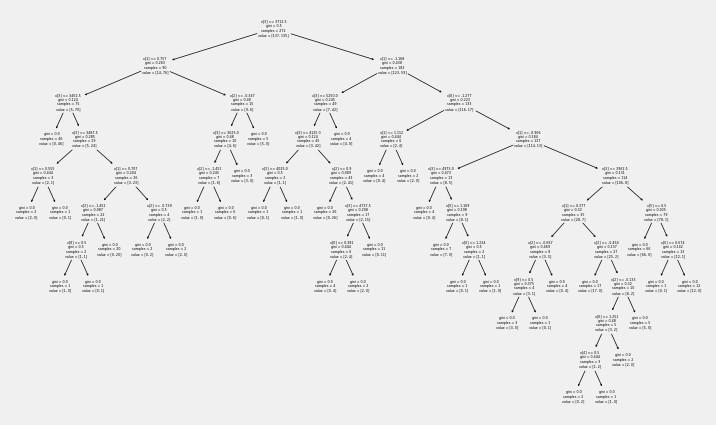

In [ ]:
from sklearn import tree
tree.plot_tree(clf) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[28 11]
 [ 3 27]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        39
           1       0.71      0.90      0.79        30

    accuracy                           0.80        69
   macro avg       0.81      0.81      0.80        69
weighted avg       0.82      0.80      0.80        69

